**Group Members**

1. Thiti Leelasomphop

2. Peem Simasathien

3. Tach Padthamkul

# **Load Dependencies**

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
from pycaret.clustering import *
import datetime

# **Load Data**

In [3]:
df = pd.read_csv('Supermarket Data.csv')

In [4]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [5]:
copy_ver=df.copy()

In [6]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
956569  PRD0904997      CL00074     DEP00021       G00007       D00002   
956570  PRD0904997      CL00074     DEP00021       G00007       D00002   
956571  PRD0904997      CL00074     DEP00021       G00007       D00002   
956572  PRD0904997      CL00074     DEP00021       G00007       D00002   
956573  PRD0904997      CL00074     DEP00021       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID  \
956569             NaN                    NaN            NaN  994101100088778   
956570             NaN                    NaN            NaN  994102700099738   
956571  CUST0000544241                     LA             YA  994101100506174   
956572  CUST0000423155                     LA             YF  994101300433650   
956573             NaN                    NaN            NaN  994102900104676   

       BASKET_SIZE BASKET_PRICE_SENSITIVITY BASKET_TYPE  \
956569           M                       MM      Top Up   
956570           L                       LA      Top Up   
956571           L                       LA      Top Up   
956572           L                       LA   Full Shop   
956573           L                       MM      Top Up   

       BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  
956569                   Fresh  STORE00002           LS          W01  
956570                   Fresh  STORE00002           LS          W01  
956571                   Fresh  STORE00002           LS          W01  
956572                   Fresh  STORE00002           LS          W01  
956573                   Fresh  STORE00002           LS          W01

In [7]:
df['morning']=np.where(df['SHOP_HOUR']<=12,1,0)
df['evening']=np.where(df['SHOP_HOUR']>=18,1,0)

In [8]:
df['weekend']=np.where((df['SHOP_WEEKDAY']==1)|(df['SHOP_WEEK']==7),1,0)

In [9]:
check=df.drop_duplicates(subset=['BASKET_ID'])
check

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200732 2007-10-05             6         17         3   6.75   
1          200733 2007-10-10             4         20         3   6.75   
2          200741 2007-12-09             1         11         1   2.25   
3          200731 2007-09-29             7         17         1   2.25   
4          200737 2007-11-10             7         14         3   6.75   
...           ...        ...           ...        ...       ...    ...   
956316     200642 2006-12-15             6         17         4   4.24   
956388     200814 2008-05-29             5         17         4   4.24   
956404     200632 2006-10-05             5         13         3   3.18   
956438     200640 2006-12-01             6         15         1   1.45   
956530     200637 2006-11-12             1         12         1   2.04   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0       PRD0900001      CL00072     DEP00021       G00007       D00002   
1       PRD0900001      CL00072     DEP00021       G00007       D00002   
2       PRD0900001      CL00072     DEP00021       G00007       D00002   
3       PRD0900001      CL00072     DEP00021       G00007       D00002   
4       PRD0900001      CL00072     DEP00021       G00007       D00002   
...            ...          ...          ...          ...          ...   
956316  PRD0904994      CL00033     DEP00008       G00004       D00002   
956388  PRD0904994      CL00033     DEP00008       G00004       D00002   
956404  PRD0904994      CL00033     DEP00008       G00004       D00002   
956438  PRD0904995      CL00075     DEP00022       G00007       D00002   
956530  PRD0904996      CL00079     DEP00022       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID  \
0       CUST0000583261                     UM             YF  994107800547472   
1       CUST0000537317                     MM             OF  994107900512001   
2       CUST0000472158                     MM             YF  994108700468327   
3       CUST0000099658                     LA             OF  994107700237811   
4                  NaN                    NaN            NaN  994108300002212   
...                ...                    ...            ...              ...   
956316             NaN                    NaN            NaN  994103600128019   
956388             NaN                    NaN            NaN  994111200059308   
956404             NaN                    NaN            NaN  994102600028677   
956438             NaN                    NaN            NaN  994103400118691   
956530             NaN                    NaN            NaN  994103100053398   

       BASKET_SIZE BASKET_PRICE_SENSITIVITY BASKET_TYPE  \
0                L                       MM      Top Up   
1                L                       MM   Full Shop   
2                L                       MM   Full Shop   
3                L                       LA   Full Shop   
4                L                       MM   Full Shop   
...            ...                      ...         ...   
956316           M                       MM  Small Shop   
956388           M                       MM  Small Shop   
956404           M                       MM  Small Shop   
956438           S                       LA  Small Shop   
956530           S                       MM  Small Shop   

       BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  morning  \
0                      Grocery  STORE00001           LS          E02        0   
1                        Fresh  STORE00001           LS          E02        0   
2                      Grocery  STORE00001           LS          E02        1   
3                        Mixed  STORE00001           LS          E02        0   
4                        Fresh  STORE00001           LS          E02        0   
...                        ...         ...          ...       

In [10]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200732 2007-10-05             6         17         3   6.75   
1          200733 2007-10-10             4         20         3   6.75   
2          200741 2007-12-09             1         11         1   2.25   
3          200731 2007-09-29             7         17         1   2.25   
4          200737 2007-11-10             7         14         3   6.75   
...           ...        ...           ...        ...       ...    ...   
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0    

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [11]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max')
                                                                                  ).reset_index()

In [12]:
df_csv

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate   LastDate
0     CUST0000000181        2.44            1          1 2007-01-06 2007-01-06
1     CUST0000000369      959.33          220        189 2006-04-16 2008-07-05
2     CUST0000000689      328.57           16        116 2007-07-22 2008-06-23
3     CUST0000000998        5.95            3          4 2006-05-04 2006-07-07
4     CUST0000001163       39.74            4         24 2006-10-22 2008-06-22
...              ...         ...          ...        ...        ...        ...
6095  CUST0000999593      453.58           30        206 2006-05-06 2008-04-02
6096  CUST0000999645      105.11           11         46 2006-04-30 2008-05-08
6097  CUST0000999654        5.86            1          4 2006-06-25 2006-06-25
6098  CUST0000999935      444.17           21        127 2006-11-29 2008-06-05
6099  CUST0000999936       17.67            6         13 2006-08-03 2008-04-17

[6100 rows x 6 columns]

In [13]:
##prepare customer single view
df2_csv = df2_groupby = check[check['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(Weekend_count=('weekend','sum'),
                                                                                         Avg_shophour=('SHOP_HOUR','mean'),
                                                                                          morning_times=('morning','sum'),
                                                                                          evening_times=('evening','sum')                                                                   
                                                                                         ).reset_index()

In [14]:
df_csv['weekend_count']=df2_csv['Weekend_count']
df_csv['Avg_shophour']=df2_csv['Avg_shophour']
df_csv['morning_times']=df2_csv['morning_times']
df_csv['evening_times']=df2_csv['evening_times']
df_csv['afternoon_times']=df_csv['TotalVisits']-df_csv['morning_times']-df_csv['evening_times']

In [15]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [16]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [17]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [18]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [19]:
#Average visits
df_csv['avg_visit_fre']=np.where(df_csv['TotalVisits']==1,np.nan,df_csv['total_days']/(df_csv['TotalVisits']-1))

In [20]:
df_csv=df_csv.dropna()

In [21]:
# Percent visit on weekend
df_csv['Percent_weekend']=df_csv['weekend_count']/df_csv['TotalVisits']

In [22]:
# Percent of visit by time of day
df_csv['Percent_morning']=df_csv['morning_times']/df_csv['TotalVisits']
df_csv['Percent_afternoon']=df_csv['afternoon_times']/df_csv['TotalVisits']
df_csv['Percent_evening']=df_csv['evening_times']/df_csv['TotalVisits']

In [23]:
df_csv

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
1     CUST0000000369      959.33          220        189 2006-04-16   
2     CUST0000000689      328.57           16        116 2007-07-22   
3     CUST0000000998        5.95            3          4 2006-05-04   
4     CUST0000001163       39.74            4         24 2006-10-22   
5     CUST0000001194     2493.83          103        403 2006-04-22   
...              ...         ...          ...        ...        ...   
6094  CUST0000999569      700.21          109         47 2006-09-01   
6095  CUST0000999593      453.58           30        206 2006-05-06   
6096  CUST0000999645      105.11           11         46 2006-04-30   
6098  CUST0000999935      444.17           21        127 2006-11-29   
6099  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  weekend_count  Avg_shophour  morning_times  evening_times  \
1    2008-07-05             29     15.409091             36             47   
2    2008-06-23              3     17.812500              3             12   
3    2006-07-07              1     10.333333              2              0   
4    2008-06-22              2     14.750000              0              0   
5    2008-06-20             17     17.262136              5             54   
...         ...            ...           ...            ...            ...   
6094 2008-07-04             15     15.100917             13             17   
6095 2008-04-02              7     14.166667              7              2   
6096 2008-05-08              2     19.000000              0              9   
6098 2008-06-05              2     15.333333              3              3   
6099 2008-04-17              0     10.500000              5              0   

      afternoon_times  TicketSize  total_days  recency  avg_visit_fre  \
1                 137    4.360591         812        1       3.707763   
2                   1   20.535625         338       13      22.533333   
3                   1    1.983333          65      730      32.500000   
4                   4    9.935000         610       14     203.333333   
5                  44   24.211942         791       16       7.754902   
...               ...         ...         ...      ...            ...   
6094               79    6.423945         673        2       6.231481   
6095               21   15.119333         698       95      24.068966   
6096                2    9.555455         740       59      74.000000   
6098               15   21.150952         555       31      27.750000   
6099                1    2.945000         624       80     124.800000   

      Percent_weekend  Percent_morning  Percent_afternoon  Percent_evening  
1            0.131818         0.163636           0.622727         0.213636  
2            0.187500         0.187500           0.062500         0.750000  
3            0.333333         0.666667           0.333333         0.000000  
4            0.500000         0.000000           1.000000         0.000000  
5            0.165049         0.048544           0.427184         0.524272  
...               ...              ...                ...              ...  
6094         0.137615         0.119266           0.724771         0.155963  
6095         0.233333         0.233333           0.700000         0.066667  
6096         0.181818         0.000000           0.181818         0.818182  
6098         0.095238         0.142857           0.714286         0.142857  
6099         0.000000         0.833333           0.166667         0.000000  

[4075 rows x 19 columns]

# **Cluster customers**

In [58]:
ignore =['CUST_CODE',
         'FirstDate', 
         'LastDate',
         'weekend_count',
         'Avg_shophour',
         'morning_times',
        'afternoon_times',
        'evening_times',
        'Percent_morning',
        'Percent_afternoon',
        'Percent_evening',
        'Percent_weekend']

In [92]:
from pycaret.clustering import *
exp_clu = setup(data=df_csv, ignore_features=ignore, normalize=True)

In [93]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

In [94]:
get_metrics()

Name       Display Name  \
ID                                                  
silhouette          Silhouette         Silhouette   
chs          Calinski-Harabasz  Calinski-Harabasz   
db              Davies-Bouldin     Davies-Bouldin   
hs           Homogeneity Score        Homogeneity   
ari                 Rand Index         Rand Index   
cs          Completeness Score       Completeness   

                                               Score Function  \
ID                                                              
silhouette  <function silhouette_score at 0x000001F52A531EE8>   
chs         <function calinski_harabasz_score at 0x000001F...   
db          <function davies_bouldin_score at 0x000001F52A...   
hs          <function homogeneity_score at 0x000001F52A54D...   
ari         <function adjusted_rand_score at 0x000001F52A5...   
cs          <function completeness_score at 0x000001F52A54...   

                                          Scorer Target Args  \
ID                                                             
silhouette         make_scorer(silhouette_score)   pred   {}   
chs         make_scorer(calinski_harabasz_score)   pred   {}   
db             make_scorer(davies_bouldin_score)   pred   {}   
hs                make_scorer(homogeneity_score)   pred   {}   
ari             make_scorer(adjusted_rand_score)   pred   {}   
cs               make_scorer(completeness_score)   pred   {}   

            Greater is Better  Needs Ground Truth  Custom  
ID                                                         
silhouette               True               False   False  
chs                      True               False   False  
db                       True               False   False  
hs                       True                True   False  
ari                      True                True   False  
cs                       True                True   False

# Compare model performance

In [95]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0562            18.6344         13.2168            0           0   

   Completeness  
0             0

In [96]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering Clustering

In [97]:
sc = create_model('sc')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.8694            86.6818          0.0914            0           0   

   Completeness  
0             0

In [98]:
plot_model(sc)

# KMeans Clustering

In [99]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.351          1845.3248          1.0082            0           0   

   Completeness  
0             0

In [100]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=678, tol=0.0001, verbose=0)


In [101]:
plot_model(kmeans)

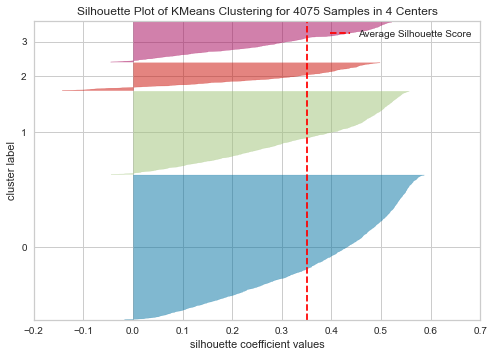

In [102]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

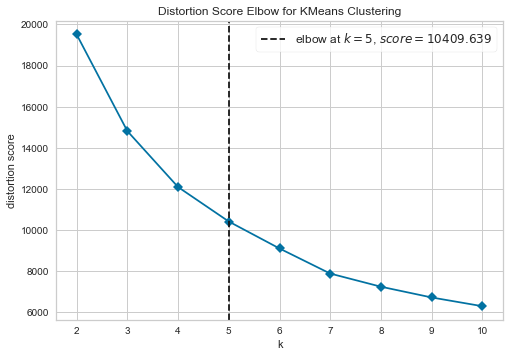

In [103]:
plot_model(kmeans, plot = 'elbow')

In [104]:
kmeans2 = create_model('kmeans',num_clusters=4)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.351          1845.3248          1.0082            0           0   

   Completeness  
0             0

In [105]:
print(kmeans2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=678, tol=0.0001, verbose=0)


In [106]:
plot_model(kmeans2)

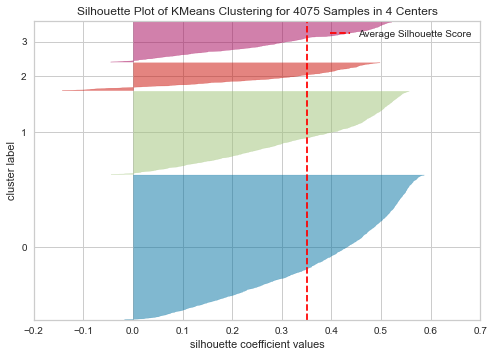

In [107]:
plot_model(kmeans2, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [108]:
kmeans_predictions = predict_model(kmeans2, data = df_csv)

In [109]:
kmeans_predictions

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
1     CUST0000000369      959.33          220        189 2006-04-16   
2     CUST0000000689      328.57           16        116 2007-07-22   
3     CUST0000000998        5.95            3          4 2006-05-04   
4     CUST0000001163       39.74            4         24 2006-10-22   
5     CUST0000001194     2493.83          103        403 2006-04-22   
...              ...         ...          ...        ...        ...   
6094  CUST0000999569      700.21          109         47 2006-09-01   
6095  CUST0000999593      453.58           30        206 2006-05-06   
6096  CUST0000999645      105.11           11         46 2006-04-30   
6098  CUST0000999935      444.17           21        127 2006-11-29   
6099  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  weekend_count  Avg_shophour  morning_times  evening_times  \
1    2008-07-05             29     15.409091             36             47   
2    2008-06-23              3     17.812500              3             12   
3    2006-07-07              1     10.333333              2              0   
4    2008-06-22              2     14.750000              0              0   
5    2008-06-20             17     17.262136              5             54   
...         ...            ...           ...            ...            ...   
6094 2008-07-04             15     15.100917             13             17   
6095 2008-04-02              7     14.166667              7              2   
6096 2008-05-08              2     19.000000              0              9   
6098 2008-06-05              2     15.333333              3              3   
6099 2008-04-17              0     10.500000              5              0   

      afternoon_times  TicketSize  total_days  recency  avg_visit_fre  \
1                 137    4.360591         812        1       3.707763   
2                   1   20.535625         338       13      22.533333   
3                   1    1.983333          65      730      32.500000   
4                   4    9.935000         610       14     203.333333   
5                  44   24.211942         791       16       7.754902   
...               ...         ...         ...      ...            ...   
6094               79    6.423945         673        2       6.231481   
6095               21   15.119333         698       95      24.068966   
6096                2    9.555455         740       59      74.000000   
6098               15   21.150952         555       31      27.750000   
6099                1    2.945000         624       80     124.800000   

      Percent_weekend  Percent_morning  Percent_afternoon  Percent_evening  \
1            0.131818         0.163636           0.622727         0.213636   
2            0.187500         0.187500           0.062500         0.750000   
3            0.333333         0.666667           0.333333         0.000000   
4            0.500000         0.000000           1.000000         0.000000   
5            0.165049         0.048544           0.427184         0.524272   
...               ...              ...                ...              ...   
6094         0.137615         0.119266           0.724771         0.155963   
6095         0.233333         0.233333           0.700000         0.066667   
6096         0.181818         0.000000           0.181818         0.818182   
6098         0.095238         0.142857           0.714286         0.142857   
6099         0.000000         0.833333           0.166667         0.000000   

        Cluster  
1     Cluster 2  
2     Cluster 0  
3     Cluster 1  
4     Cluster 0  
5     Cluster 2  
...         ...  
6094  Cluster 0  
6095  Cluster 0  
6096  Cluster 0  
6098  Cluster 0  
6099  Cluster 0  

[4075 rows x 20 columns]

In [110]:
from pycaret.classification import *

In [111]:
exp_clf = setup(kmeans_predictions, target = 'Cluster' ,ignore_features=ignore, normalize=True)

In [112]:
decission_tree=create_model('rf')

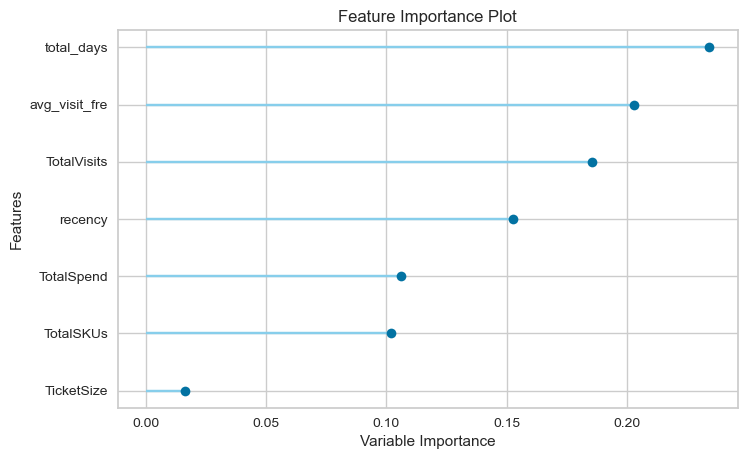

In [113]:
plot_model(decission_tree,'feature')

In [114]:
##prepare customer single view
cluster = cluster_groupby = kmeans_predictions[kmeans_predictions['Cluster'].notnull()].groupby(by=['Cluster']).agg(TotalSpend=('TotalSpend', 'mean'),
                                                                                  TotalVisits=('TotalVisits', 'mean'),
                                                                                  TotalSKUs=('TotalSKUs', 'mean'),
                                                                                  Percent_weekend=('Percent_weekend','mean'),
                                                                                  avg_visit_fre=('avg_visit_fre','mean'),
                                                                                  recency=('recency','mean'),
                                                                                  total_days=('total_days','mean'),
                                                                                  TicketSize=('TicketSize','mean'),
                                                                                  Percent_morning=('Percent_morning','mean'),
                                                                                  Percent_evening=('Percent_evening','mean'),
                                                                                  Percent_afternoon=('Percent_afternoon','mean')
                                                                                  ).reset_index()

In [115]:
cluster

Cluster   TotalSpend  TotalVisits   TotalSKUs  Percent_weekend  \
0  Cluster 0   249.107053    25.068170   68.178947         0.139991   
1  Cluster 1    30.673301     3.448035   13.672489         0.144373   
2  Cluster 2  2458.278930   169.360313  361.895561         0.144746   
3  Cluster 3    18.568931     2.407609    6.559783         0.147041   

   avg_visit_fre     recency  total_days  TicketSize  Percent_morning  \
0      64.809591   44.151378  638.091228   11.643961         0.299247   
1      73.338137  359.395633  142.433188    8.538875         0.292654   
2       8.008817    5.812010  791.686684   19.109882         0.313344   
3     396.804952   99.559783  510.036232    7.886703         0.319595   

   Percent_evening  Percent_afternoon  
0         0.253030           0.447723  
1         0.263631           0.443715  
2         0.238493           0.448163  
3         0.225543           0.454861

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mean')

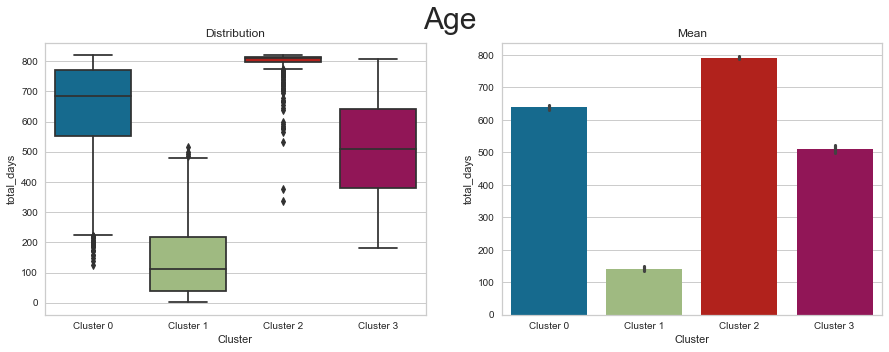

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Age',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="total_days",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="total_days",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

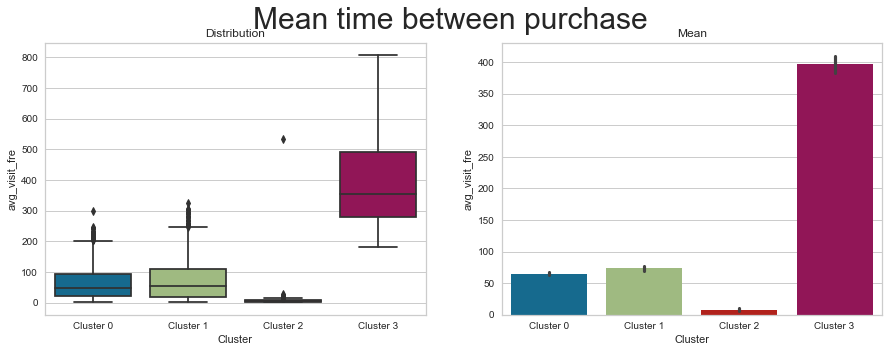

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Mean time between purchase',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="avg_visit_fre",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="avg_visit_fre",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

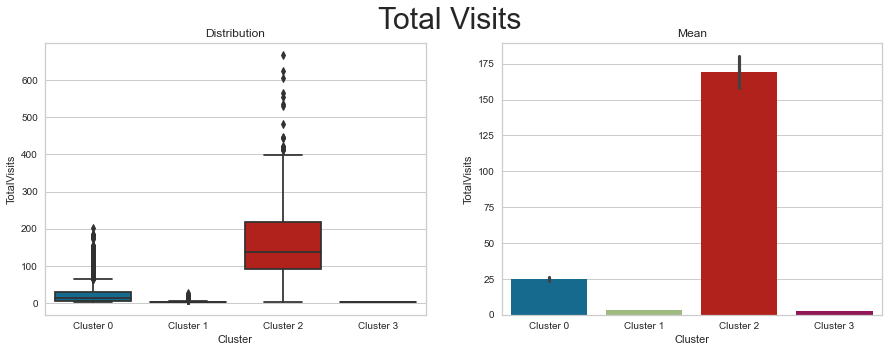

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Total Visits',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TotalVisits",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TotalVisits",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

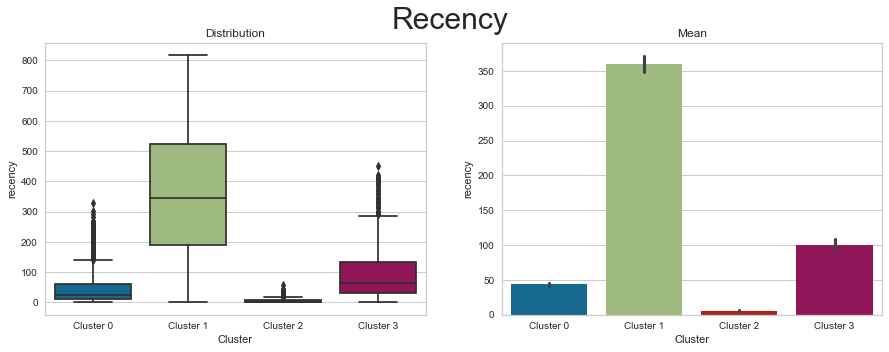

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Recency',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="recency",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="recency",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

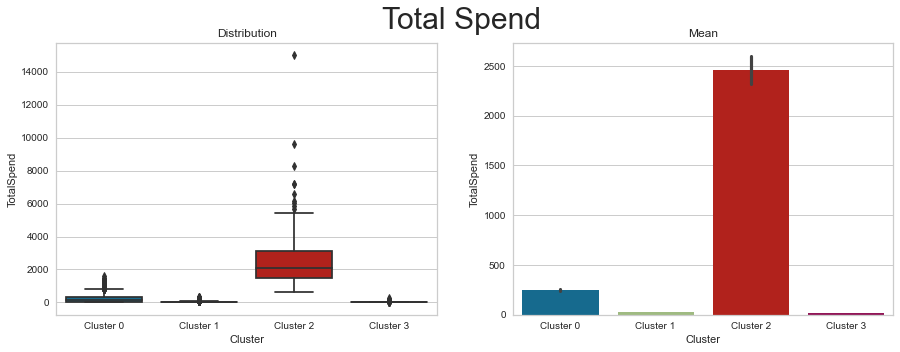

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Total Spend',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TotalSpend",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TotalSpend",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

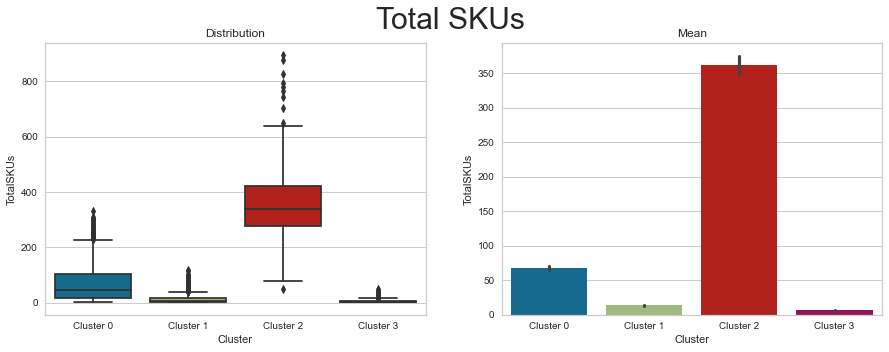

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Total SKUs',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TotalSKUs",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TotalSKUs",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

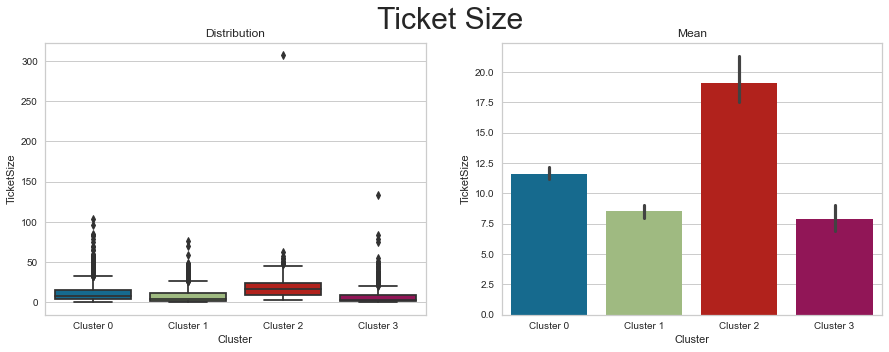

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Ticket Size',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TicketSize",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TicketSize",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

จาก K-Mean Clustering โดยกำหนดค่า K=5 จะได้ทั้งหมด 4 กลุ่ม 

โดย Feature สำคัญคือ Total Day -> Mean time between purchase -> Total visit -> recency -> Total Spend -> Total SKUs -> Ticket size 

_____ 
กลุ่ม 2 Gold : มาบ่อย / เป็นสมาชิกมานาน / ซื้อเยอะ --> อัพเป็น serenade member เก็บยอดซื้อเพื่อรักษาสภาพ serenade / สิทธิพิเศษ serenade
กลุ่ม 0 Silver : มาค่อนข้างบ่อย / ซื้อค่อนข้างเยอะ --> โปรสะสมแต้ม เพื่ออัพเป็น serenade
กลุ่ม 3 Bronze : นานมาที / ซื้อน้อย --> ส่งโปรโมชั่นกระตุ้นให้มาซื้อบ่อยขึ้น เช่นโปรโมชั่นสะสมแต้ม
กลุ่ม 1 Plastic : ลูกค้าใหม่/ขาจร/หายไปแล้ว --> no action
